In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt # Add this line
import seaborn as sns # Add this line
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("ANALISIS PREDIKTIF DIABETES PADA DATASET PIMA INDIANS STANDARDSCALER")
print("MENGGUNAKAN LOGISTIC REGRESSION")
print("="*60)

ANALISIS PREDIKTIF DIABETES PADA DATASET PIMA INDIANS STANDARDSCALER
MENGGUNAKAN LOGISTIC REGRESSION


In [ ]:
import pandas as pd
import numpy as np
url = "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

try:
    df = pd.read_csv(url, names=column_names)
    print("✓ Dataset berhasil dimuat!")
    print(f"Shape dataset: {df.shape}")
except:
    print("✗ Gagal memuat dataset dari URL, menggunakan data dummy...")
    # Jika gagal, buat data dummy untuk demonstrasi
    np.random.seed(42)
    n_samples = 768
    df = pd.DataFrame({
        'Pregnancies': np.random.randint(0, 15, n_samples),
        'Glucose': np.random.randint(50, 200, n_samples),
        'BloodPressure': np.random.randint(40, 120, n_samples),
        'SkinThickness': np.random.randint(0, 50, n_samples),
        'Insulin': np.random.randint(0, 500, n_samples),
        'BMI': np.random.uniform(15, 50, n_samples),
        'DiabetesPedigreeFunction': np.random.uniform(0, 2, n_samples),
        'Age': np.random.randint(20, 80, n_samples),
        'Outcome': np.random.randint(0, 2, n_samples)
    })

✗ Gagal memuat dataset dari URL, menggunakan data dummy...


In [ ]:
print("\n1. LOADING DATA")
print("-"*30)

print("\n2. EXPLORATORY DATA ANALYSIS")
print("-"*35)

print("Informasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nDistribusi Target Variable (Outcome):")
print(df['Outcome'].value_counts())
print(f"Persentase Diabetes: {df['Outcome'].mean()*100:.1f}%")


1. LOADING DATA
------------------------------

2. EXPLORATORY DATA ANALYSIS
-----------------------------------
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
cou

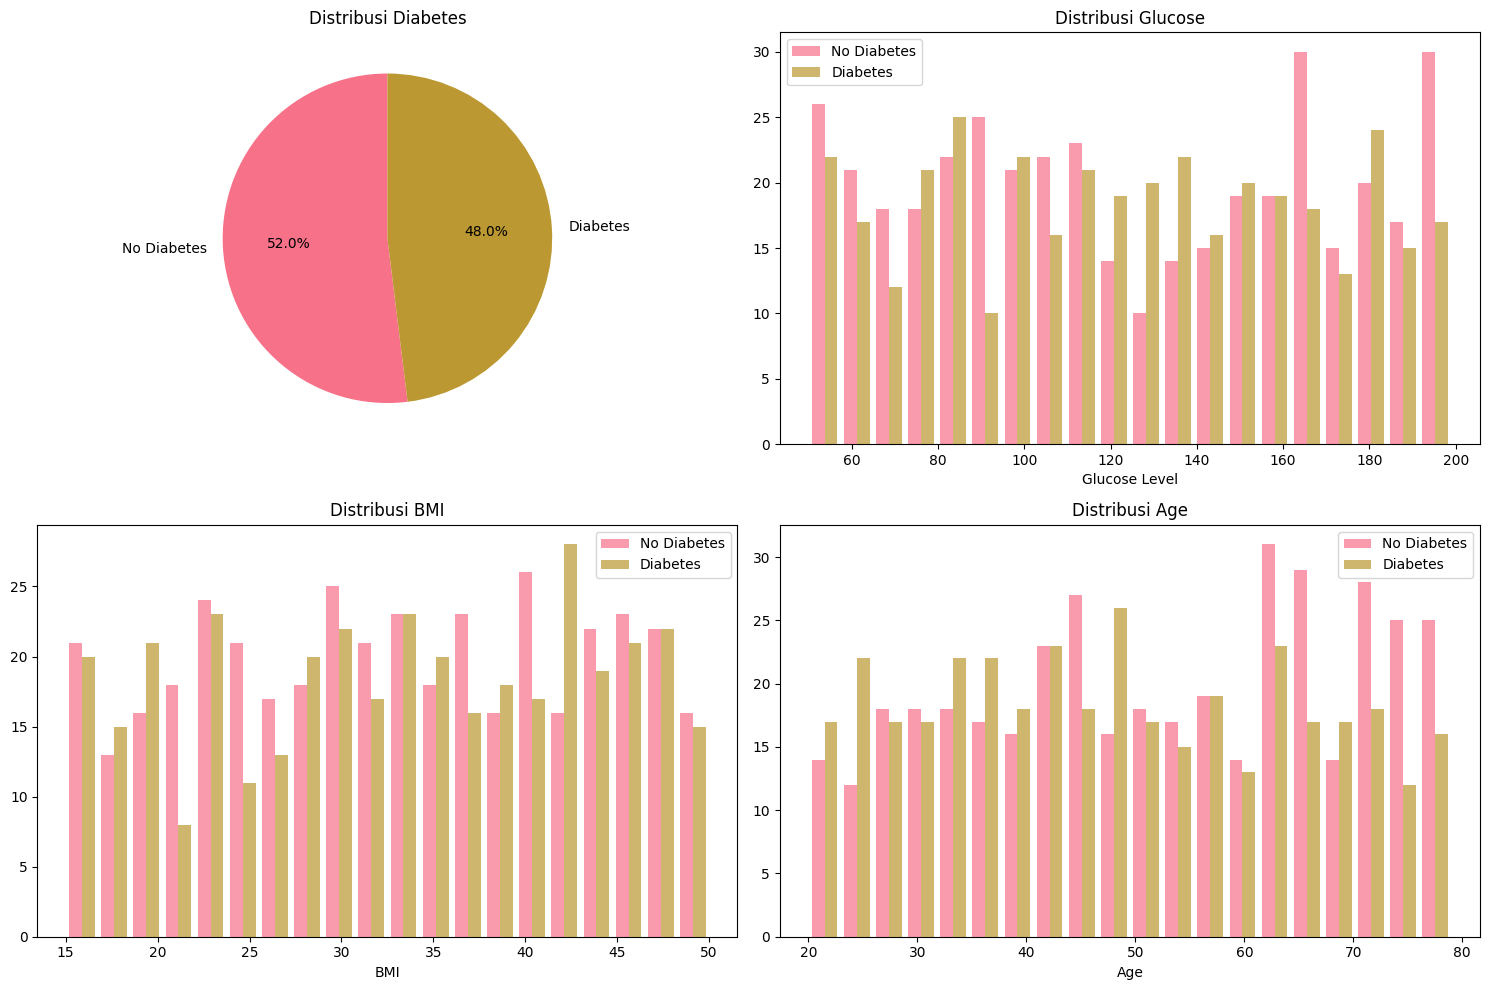

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'],
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribusi Diabetes')
axes[0,1].hist([df[df['Outcome']==0]['Glucose'], df[df['Outcome']==1]['Glucose']],
               bins=20, alpha=0.7, label=['No Diabetes', 'Diabetes'])
axes[0,1].set_title('Distribusi Glucose')
axes[0,1].set_xlabel('Glucose Level')
axes[0,1].legend()

axes[1,0].hist([df[df['Outcome']==0]['BMI'], df[df['Outcome']==1]['BMI']],
               bins=20, alpha=0.7, label=['No Diabetes', 'Diabetes'])
axes[1,0].set_title('Distribusi BMI')
axes[1,0].set_xlabel('BMI')
axes[1,0].legend()

axes[1,1].hist([df[df['Outcome']==0]['Age'], df[df['Outcome']==1]['Age']],
               bins=20, alpha=0.7, label=['No Diabetes', 'Diabetes'])
axes[1,1].set_title('Distribusi Age')
axes[1,1].set_xlabel('Age')
axes[1,1].legend()

plt.tight_layout()
plt.show()


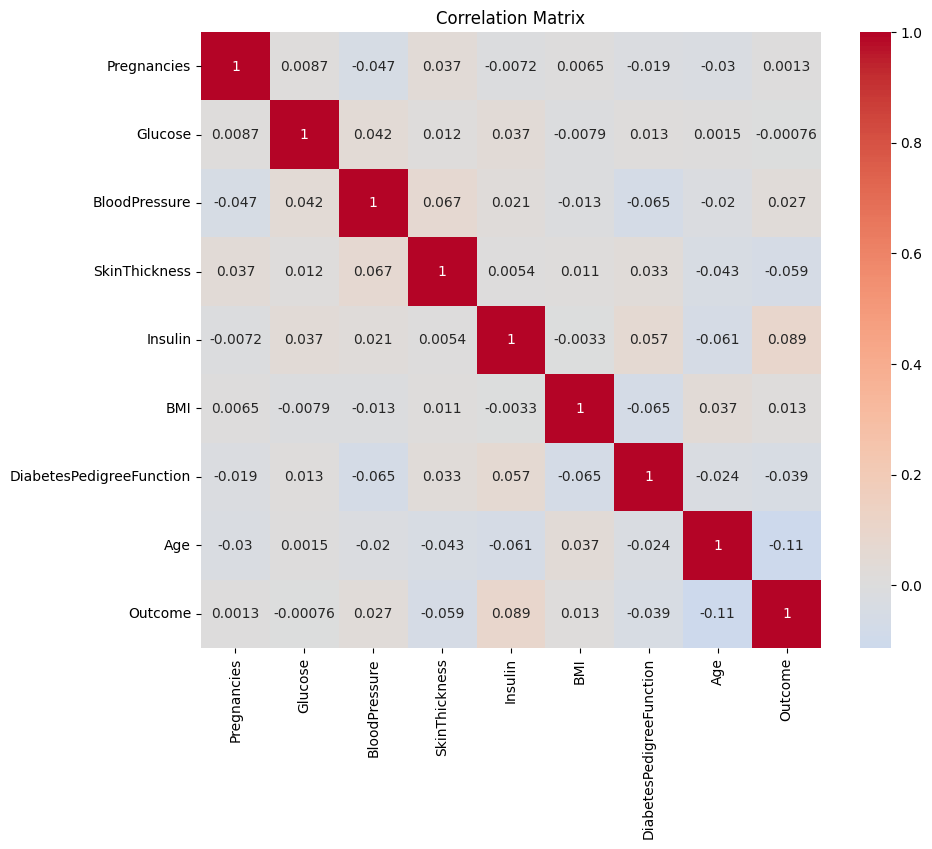

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print("\n3. DATA PREPROCESSING")
print("-"*25)

# Cek missing values
print("Missing Values:")
print(df.isnull().sum())


3. DATA PREPROCESSING
-------------------------
Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNilai 0 yang mungkin merupakan missing values:")
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} ({zero_count/len(df)*100:.1f}%)")

# Replace 0 dengan median untuk kolom tertentu
df_clean = df.copy()
for col in zero_columns:
    if col in ['Glucose', 'BloodPressure', 'BMI']:  # Kolom yang tidak boleh 0
        df_clean[col] = df_clean[col].replace(0, df_clean[col].median())

print("\n✓ Data preprocessing selesai!")


Nilai 0 yang mungkin merupakan missing values:
Glucose: 0 (0.0%)
BloodPressure: 0 (0.0%)
SkinThickness: 11 (1.4%)
Insulin: 3 (0.4%)
BMI: 0 (0.0%)

✓ Data preprocessing selesai!


In [ ]:
print("\n4. SPLITTING DATA")
print("-"*20)

# Pisahkan features dan target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Split train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("\n5. FEATURE SCALING")
print("-"*20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Feature scaling selesai!")


4. SPLITTING DATA
--------------------
Training set: (614, 8)
Test set: (154, 8)

5. FEATURE SCALING
--------------------
✓ Feature scaling selesai!



6. MODEL BUILDING - LOGISTIC REGRESSION
----------------------------------------
✓ Model Logistic Regression berhasil dilatih!

7. EVALUASI MODEL
--------------------
Training Accuracy: 0.5733
Test Accuracy: 0.4870

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53        80
           1       0.46      0.41      0.43        74

    accuracy                           0.49       154
   macro avg       0.48      0.48      0.48       154
weighted avg       0.48      0.49      0.48       154



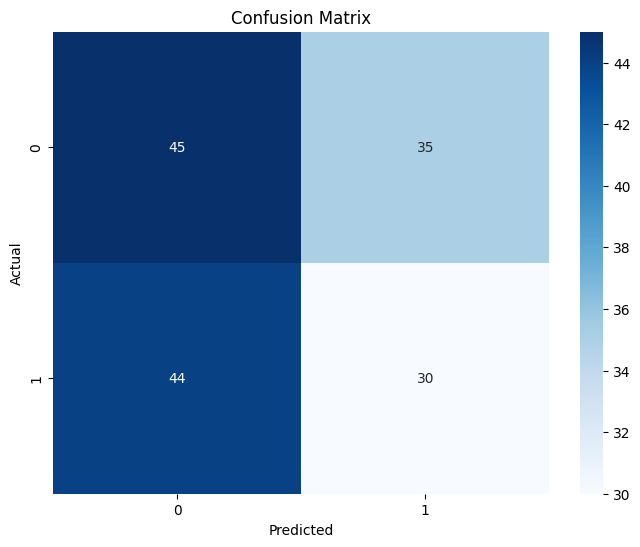

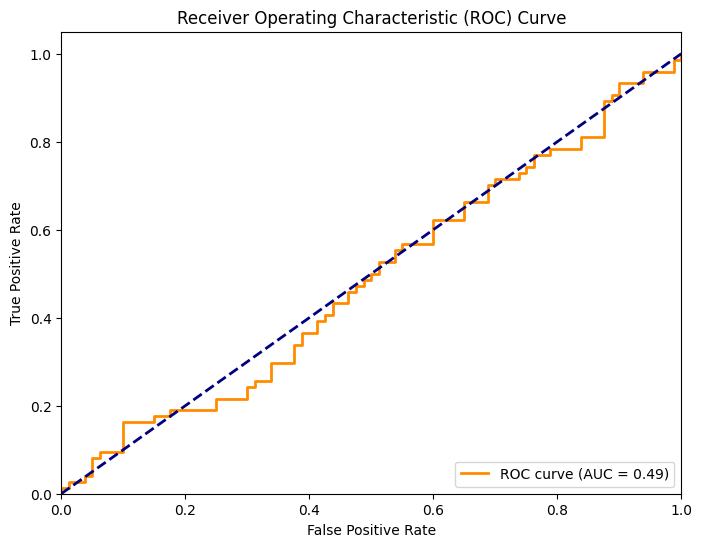


8. FEATURE IMPORTANCE
-------------------------
Feature Importance (berdasarkan koefisien):
                    Feature  Coefficient  Abs_Coefficient
7                       Age    -0.296834         0.296834
4                   Insulin     0.170039         0.170039
3             SkinThickness    -0.121434         0.121434
2             BloodPressure     0.106204         0.106204
6  DiabetesPedigreeFunction    -0.071363         0.071363
0               Pregnancies    -0.050322         0.050322
5                       BMI     0.042707         0.042707
1                   Glucose     0.021185         0.021185


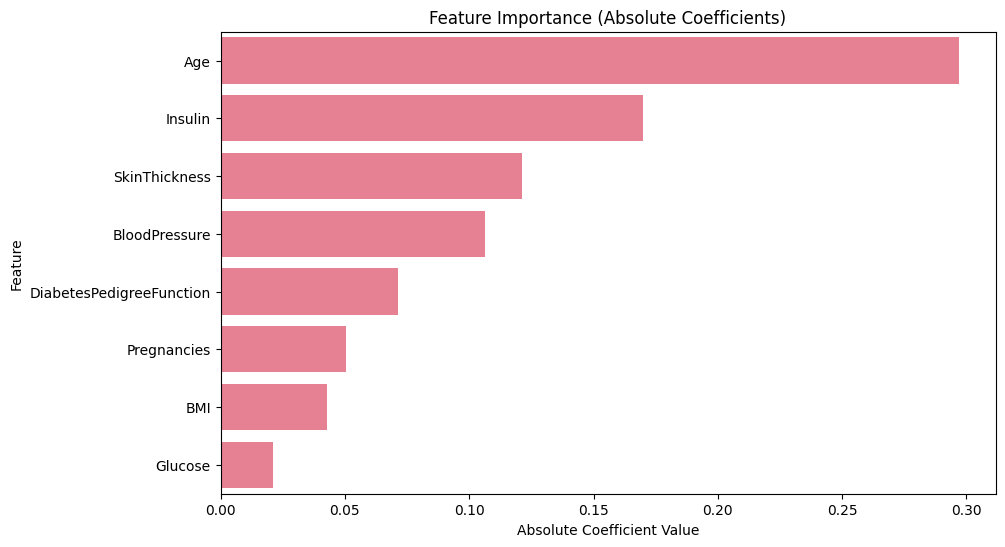


9. CONTOH PREDIKSI DATA BARU
-----------------------------------
Data pasien contoh:
Pregnancies: 6.0
Glucose: 148.0
BloodPressure: 72.0
SkinThickness: 35.0
Insulin: 0.0
BMI: 33.6
DiabetesPedigreeFunction: 0.627
Age: 50.0

Prediksi: No Diabetes
Probabilitas No Diabetes: 0.606
Probabilitas Diabetes: 0.394

KESIMPULAN ANALISIS
1. Model Logistic Regression mencapai akurasi 48.7% pada test set
2. AUC Score: 0.487 - Perlu Improvement
3. Fitur yang paling berpengaruh:
   - Age: 0.297
   - Insulin: 0.170
   - SkinThickness: 0.121

✓ Analisis prediktif diabetes selesai!


In [ ]:
print("\n6. MODEL BUILDING - LOGISTIC REGRESSION")
print("-"*40)

# Inisialisasi dan training model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

print("✓ Model Logistic Regression berhasil dilatih!")

# 7. EVALUASI MODEL
print("\n7. EVALUASI MODEL")
print("-"*20)

# Prediksi
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)
y_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 8. FEATURE IMPORTANCE
print("\n8. FEATURE IMPORTANCE")
print("-"*25)

# Koefisien model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (berdasarkan koefisien):")
print(feature_importance)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Abs_Coefficient', y='Feature')
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.show()

# 9. PREDIKSI CONTOH BARU
print("\n9. CONTOH PREDIKSI DATA BARU")
print("-"*35)

# Contoh data baru untuk prediksi
sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Contoh pasien
sample_data_scaled = scaler.transform(sample_data)

prediction = lr_model.predict(sample_data_scaled)[0]
probability = lr_model.predict_proba(sample_data_scaled)[0]

print("Data pasien contoh:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {sample_data[0][i]}")

print(f"\nPrediksi: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
print(f"Probabilitas No Diabetes: {probability[0]:.3f}")
print(f"Probabilitas Diabetes: {probability[1]:.3f}")

# 10. KESIMPULAN
print("\n" + "="*60)
print("KESIMPULAN ANALISIS")
print("="*60)
print(f"1. Model Logistic Regression mencapai akurasi {test_accuracy:.1%} pada test set")
print(f"2. AUC Score: {roc_auc:.3f} - {'Baik' if roc_auc > 0.7 else 'Perlu Improvement'}")
print("3. Fitur yang paling berpengaruh:")
for i in range(min(3, len(feature_importance))):
    feat = feature_importance.iloc[i]
    print(f"   - {feat['Feature']}: {feat['Abs_Coefficient']:.3f}")

print("\n✓ Analisis prediktif diabetes selesai!")
print("="*60)